# ITNPBD2 Representing and Manipulating Data

# Accessing Data from Online Sources
## REST interfaces and remote file access

# REST API
## Representational State Transfer
- Usually applied to web services
- Uses HTTP protocol
- API calls all part of the URL
- Data returned as an internet media type:
 * JSON
 * XML
 * Images
 
Use the `Requests` module in Python


In [1]:
import requests

# The Victoria and Albert Museum (V&A) REST Interface
- Access to data on their collection in JSON format
- URL specifies what you want to search for
- Default response is 15 objects in JSON array (but as text)
- See `https://www.vam.ac.uk/api` for documentation

In [2]:
url="https://www.vam.ac.uk/api/json/museumobject/search?q=Turner"
resp = requests.get(url)
print (resp.status_code)
print (resp.content)

200
b'{\n    "meta": {\n        "cluster_counts": {},\n        "result_count": 17870,\n        "group_details": [],\n        "clusters": []\n    },\n    "records": [\n        {\n            "fields": {\n                "slug": "landscape-after-turner-watercolour",\n                "museum_number": "P.32-1920",\n                "date_text": "ca. 1850-1906",\n                "latitude": "",\n                "place": "Britain",\n                "title": "Landscape after Turner",\n                "longitude": "",\n                "rights": 3,\n                "collection_code": "PDP",\n                "museum_number_token": "p321920",\n                "sys_updated": "",\n                "primary_image_id": "2006BF2366",\n                "location": "Prints & Drawings Study Room, level H, case WD, shelf 61",\n                "object_number": "O1190366",\n                "object": "Watercolour",\n                "artist": "Hercules Brabazon Brabazon"\n            },\n            "pk": 43022,

In [3]:
import json
d=json.loads(resp.content)
print(d)

{'meta': {'cluster_counts': {}, 'result_count': 17870, 'group_details': [], 'clusters': []}, 'records': [{'fields': {'slug': 'landscape-after-turner-watercolour', 'museum_number': 'P.32-1920', 'date_text': 'ca. 1850-1906', 'latitude': '', 'place': 'Britain', 'title': 'Landscape after Turner', 'longitude': '', 'rights': 3, 'collection_code': 'PDP', 'museum_number_token': 'p321920', 'sys_updated': '', 'primary_image_id': '2006BF2366', 'location': 'Prints & Drawings Study Room, level H, case WD, shelf 61', 'object_number': 'O1190366', 'object': 'Watercolour', 'artist': 'Hercules Brabazon Brabazon'}, 'pk': 43022, 'model': 'collection.museumobject'}, {'fields': {'slug': 'engraving-after-a-work-by-print', 'museum_number': 'E.2751-1946', 'date_text': 'ca. 19th century', 'latitude': '', 'place': 'Britain', 'title': 'Engraving after a work by J. M. W. Turner', 'longitude': '', 'rights': 3, 'collection_code': 'PDP', 'museum_number_token': 'e27511946', 'sys_updated': '', 'primary_image_id': '2017

In [4]:
# List the artist names of the objects found
for o in d['records']:
    print(o['fields']['artist'])

Hercules Brabazon Brabazon
Turner
Turner, Benjamin Brecknell
Turner Palgrave, Elizabeth
Turner
Turner
Turner
Turner
Turner
Turner
Turner
Turner
Turner
Turner
Turner


In [5]:
# Now look for Turners with an image - add image=1 to URL
url="https://www.vam.ac.uk/api/json/museumobject/search?q=Turner&images=1"
resp = requests.get(url)
d=json.loads(resp.content)
for o in d['records']:
    print(o['fields']['artist'],o['fields']['primary_image_id'])

Turner & Co. 2010ED8362
Hercules Brabazon Brabazon 2006BF2366
Turner 2017JW5611
Turner & Co. 2007BP4889
Turner & Co. 2007BP4904
Turner & Co. 2008BR9288
J.M.W. Turner 2006BB5716
Turner, Benjamin Brecknell 2007BL8921
Unknown 2014HH0382
Turner & Co. 2010EJ4362
Turner & Co. 2010EJ1652
Richard Redgrave 2017KE4979
Turner & Co. 2007BP4863
Turner Palgrave, Elizabeth 2017JU0904
Turner & Co. 2010EA0604


# Get the Image and display using PIL

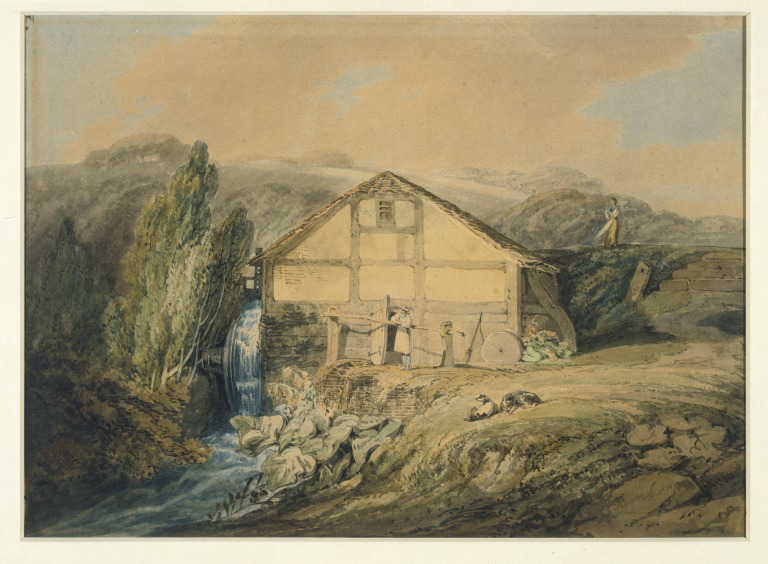

In [6]:
from PIL import Image
url = "http://media.vam.ac.uk/media/thira/collection_images/2006BB/2006BB5716.jpg"
display(Image.open(requests.get(url, stream = True).raw))

# Access Data Directly from Github
- https://github.com/mwaskom/seaborn-data/blob/master/flights.csv
- Trick is to change the URL using `https://raw.githubusercontent.com/`
- Note the `blob` folder is not included ...

In [7]:
import pandas as pd
flights=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
flights.head()


year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

# Enhanced Github plugin for Chrome is useful here:
https://chrome.google.com/webstore/detail/enhanced-github/anlikcnbgdeidpacdbdljnabclhahhmd?hl=en

# Some functions that can read files can read from a URL and some cannot
- Pandas `read_csv` YES
- Numpy `loadtxt` and `genfromtxt` YES
- File `open` NO
- OpenCV `imread` NO

In [8]:
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv"
#with open(url) as f:
#    data = f.read()
#print(data)

import numpy as np
npf = np.genfromtxt(url, skip_header = 1 ,delimiter = ",", dtype=None, encoding=None)
print(npf)

f = pd.read_csv(url)
print(f)

[(1949, 'January', 112) (1949, 'February', 118) (1949, 'March', 132)
 (1949, 'April', 129) (1949, 'May', 121) (1949, 'June', 135)
 (1949, 'July', 148) (1949, 'August', 148) (1949, 'September', 136)
 (1949, 'October', 119) (1949, 'November', 104) (1949, 'December', 118)
 (1950, 'January', 115) (1950, 'February', 126) (1950, 'March', 141)
 (1950, 'April', 135) (1950, 'May', 125) (1950, 'June', 149)
 (1950, 'July', 170) (1950, 'August', 170) (1950, 'September', 158)
 (1950, 'October', 133) (1950, 'November', 114) (1950, 'December', 140)
 (1951, 'January', 145) (1951, 'February', 150) (1951, 'March', 178)
 (1951, 'April', 163) (1951, 'May', 172) (1951, 'June', 178)
 (1951, 'July', 199) (1951, 'August', 199) (1951, 'September', 184)
 (1951, 'October', 162) (1951, 'November', 146) (1951, 'December', 166)
 (1952, 'January', 171) (1952, 'February', 180) (1952, 'March', 193)
 (1952, 'April', 181) (1952, 'May', 183) (1952, 'June', 218)
 (1952, 'July', 230) (1952, 'August', 242) (1952, 'September

# Using the Twitter API
- Here we use `requests` directly to access the Twitter API
- There are also Twitter Python packages that wrap this in slightly more friendly functions
- The first part sets up the authentification - you would need a Twitter developer account to do this. See https://developer.twitter.com/

In [9]:
# Read these from a file so I don't share my keys with you all!!
with open('data/twitterauth.txt') as f:
    client_key = f.readline().strip()
    client_secret = f.readline().strip()

import base64

key_secret = '{}:{}'.format(client_key, client_secret).encode('ascii')
b64_encoded_key = base64.b64encode(key_secret)
b64_encoded_key = b64_encoded_key.decode('ascii')

import requests

auth_url = 'https://api.twitter.com/oauth2/token'

auth_headers = {
    'Authorization': 'Basic {}'.format(b64_encoded_key),
    'Content-Type': 'application/x-www-form-urlencoded;charset=UTF-8'
}

auth_data = {
    'grant_type': 'client_credentials'
}

# Get access token to use in future queries to the API
auth_resp = requests.post(auth_url, headers=auth_headers, data=auth_data)
access_token = auth_resp.json()['access_token']

FileNotFoundError: [Errno 2] No such file or directory: 'data/twitterauth.txt'

- And the second part makes the query

In [10]:
search_headers = {
    'Authorization': f'Bearer {access_token}'
}

search_params = {
    'q': 'Brewdog',
    'result_type': 'recent',
    'count': 2
}

search_url = "https://api.twitter.com/1.1/search/tweets.json"
search_resp = requests.get(search_url, headers=search_headers, params=search_params)
tweet_data = search_resp.json()
tweet_data

NameError: name 'access_token' is not defined